# Finite volume schemes

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

plt.rcParams['font.size'] = 12.0
plt.rcParams['figure.figsize']=[8,6]

## 1. Advection problem – constant or variable velocity

We first solve the easy linear problem
$$\partial_t u + \partial_x (a u) = 0,\quad x\in[0,L]$$
with periodic boundary conditions. Firstly, the velocity $a>0$ is constant in space and time.

> **Some tools:**  
> The following function will be usefull to represent the discrete solutions $(U_j^n)$ as functions of space and time.  
> General syntax: `SHOW(data=UTX,leg='scheme')`  
> 
> `SHOW()` to draw the data stored in the 2-dimensional array `UTX`.  
>
> `SHOW(UTX_other)` to draw the data stored in another array `UTX_other`.
>
> `SHOW(UTX_other,leg='truc')` to add the title `truc` to the figures.

In [2]:
UTX = []
def SHOW(data=UTX,leg='scheme'):
    fig,(ax1, ax2) = plt.subplots(1,2,figsize=(14, 6))
    im = ax1.imshow(data[1:,:-1],interpolation='none',\
                   origin="lower",extent=[0,L,0,T],\
                   cmap=plt.get_cmap('jet'))
    fig.colorbar(im,ax=ax1)
    ax1.set_aspect('auto')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$t$')
    ax2.plot(data[0,:-1],u0(data[0,:-1]),'.-',data[0,:-1],data[-1,:-1],'x-')
    ax2.set_aspect('auto')
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$u$')
    ax2.legend(['Initial','Final'])
    fig.suptitle(leg, fontsize=14, weight='bold')
    plt.show()

In [3]:
###############################
# PDE problem
T = 5       # final time
L = 5       # space length

def Fadv(u):
    a = 1
    return a*u, a*np.ones_like(u)  # returns f(u) and f'(u) (usefull for some CFL bounds)
def u0(x):   # initial data
    return np.array([0.5-0.5*np.sign(y-1)*np.sign(y-2) for y in x])
Flux = Fadv # flux function

###############################

# Numerical parameters
J = 20     # number of points
mu = 1  # cfl parameter

# Discretization
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1] # removes the very last point for periodicity

###############################

## Initialisation
t = 0
U = u0(x)
UTX = np.concatenate([[x],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)           # compute f(U_j^0)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))    # boundary conditions
    F,dF = Flux(V)                            # compute f(U_j)
    # then the discrete fluxes F_{j+1/2}
    NumFlux = F[:-1]                          # left flux
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])  # Update
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)
    
LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

# Storage
UTX1 = UTX

In [4]:
# PDE problem
T = 5       # final time
L = 5       # space length
def Fadv(u):
    a = 1
    return a*u, a*np.ones_like(u)  # returns f(u) and f'(u) (usefull for some CFL bounds)
def u0(x):   # initial data
    return np.array([0.5-0.5*np.sign(y-1)*np.sign(y-2) for y in x])
Flux = Fadv # flux function


# Numerical parameters
J = 20     # number of points
mu = 0.9  # cfl parameter

# Discretization
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)           # compute f(U_j^0)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))    # boundary conditions
    F,dF = Flux(V)                            # compute f(U_j)
    # then the discrete fluxes F_{j+1/2}
    NumFlux = F[:-1]                          # left flux
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])  # Update
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)

LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)
    
UTX2=UTX

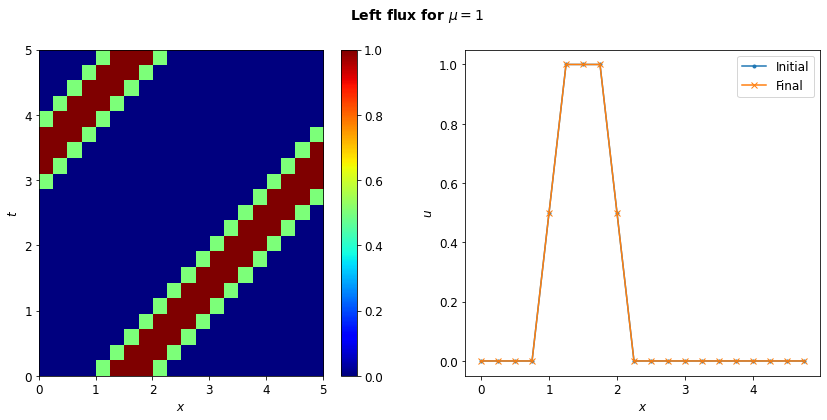

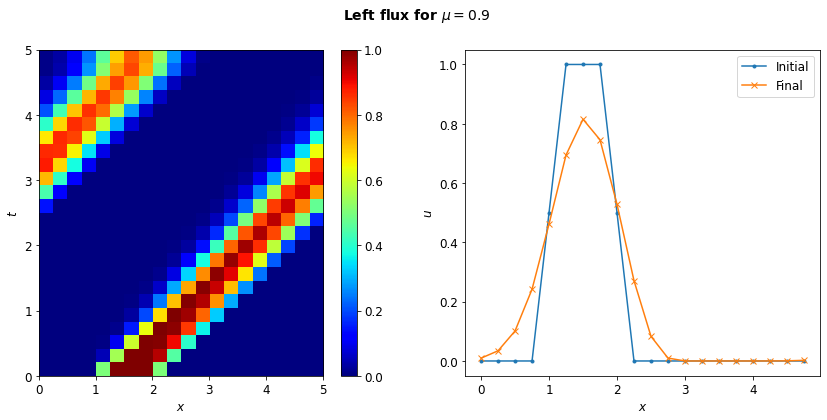

In [5]:
SHOW(UTX1,leg='Left flux for $\mu=1$')
SHOW(UTX2,leg='Left flux for $\mu=0.9$')

> **Question 1.** For the two above CFL parameters $\mu\in\{0.9,1\}$, compute the solution with $J=200$ cells to observe the convergence.

> **Answer 1.**

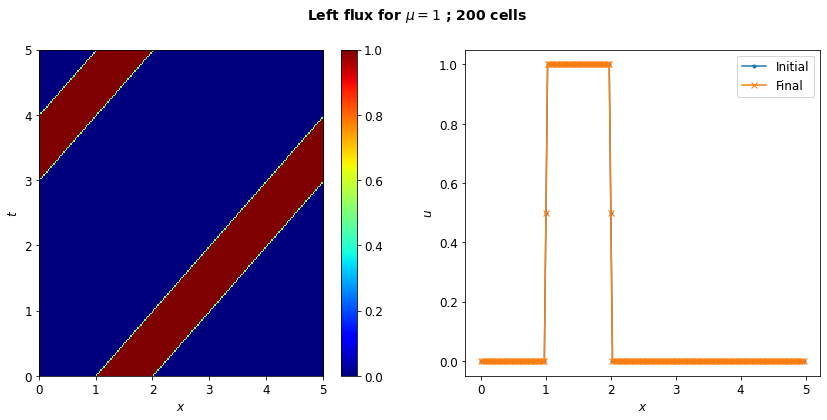

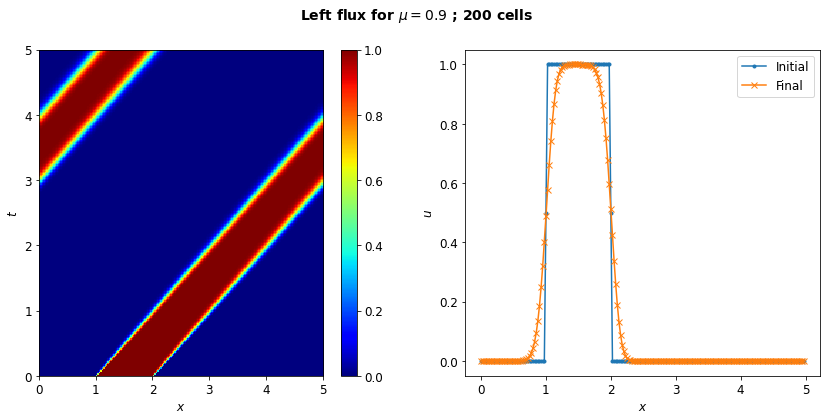

In [6]:
###############################
# PDE problem
T = 5       # final time
L = 5       # space length

def Fadv(u):
    a = 1
    return a*u, a*np.ones_like(u)  # returns f(u) and f'(u) (usefull for some CFL bounds)
def u0(x):   # initial data
    return np.array([0.5-0.5*np.sign(y-1)*np.sign(y-2) for y in x])
Flux = Fadv # flux function

###############################

# Numerical parameters
J = 200     # number of points


# Discretization
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1] # removes the very last point for periodicity

###############################


######## FIRST CFL NUMBER
mu = 1

## Initialisation
t = 0
U = u0(x)
UTX = [x.copy()]
UTX = np.concatenate([UTX,[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)           # compute f(U_j^0)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))    # boundary conditions
    F,dF = Flux(V)                            # compute f(U_j)
    # then the discrete fluxes F_{j+1/2}
    NumFlux = F[:-1]                          # left flux
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])  # Update
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)
    
LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

# Storage
UTX1 = UTX


######## SECOND CFL NUMBER
mu = 0.9

## Initialize
U = u0(x)
t = 0
UTX = [x.copy()]
UTX = np.concatenate([UTX,[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)           # compute f(U_j^0)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))    # boundary conditions
    F,dF = Flux(V)                            # compute f(U_j)
    # then the discrete fluxes F_{j+1/2}
    NumFlux = F[:-1]                          # left flux
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])  # Update
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)
    
LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)
    
UTX2=UTX


SHOW(UTX1,leg='Left flux for $\mu=1$ ; '+str(J)+' cells')
SHOW(UTX2,leg='Left flux for $\mu=0.9$ ; '+str(J)+' cells')

> *Remark.* The scheme for $\mu=1$ is exact since it exactly reproduces the transport along characteristic lines, that are aligned with the space-time grid. For $\mu<1$, we observe the smoothing of the discontinuity, due to the diffusion effect of the scheme (see previous work on finite difference schemes). However, the discrete profile is closer to the exact solution for a large grid.

> **Question 2.** Now implement the Lax-Friedrichs flux  
> $$F_{j+1/2}^n = \dfrac{1}{2}(f(U_j^n)+f(U_{j+1}^n)) - \dfrac{\sigma}{2}(U_{j+1}^n-U_{j}^n),$$
> with $\sigma = \max\big\{|f'(u)|,\ u \in[\inf u_0,\sup u_0]\big\}.$  
> Compare the discrete solution with $\mu=0.9$ to the one obtained with the previous left scheme.

> **Answer 2.**

In [7]:
# PDE problem
T = 5       # final time
L = 5       # space length
Flux = Fadv # flux function

# Numerical data
J = 200     # number of points
mu = 0.9  # cfl parameter

# Discretization parameters
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x.copy()],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)           # compute f(U_j^0)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)
sigma = Vmax

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))    # boundary conditions
    F,dF = Flux(V)                            # compute f(U_j)
    # then the discrete fluxes F_{j+1/2}
    NumFlux = 0.5*(F[:-1] + F[1:]) - 0.5*sigma*(V[1:]-V[:-1]) # Lax-Friedrichs
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])  # Update
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)
    
LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

UTXLF = UTX

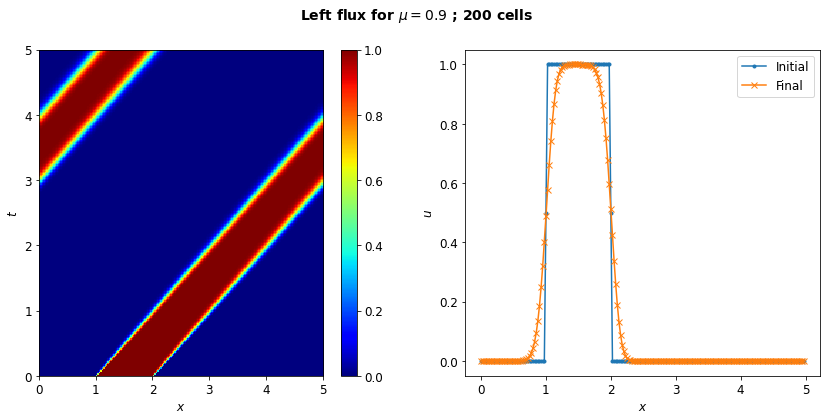

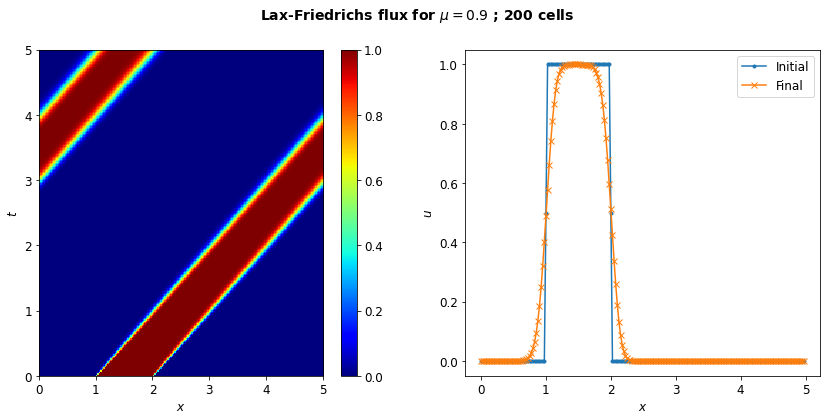

In [8]:
SHOW(UTX2,leg='Left flux for $\mu=0.9$ ; '+str(J)+' cells')
SHOW(UTXLF,leg='Lax-Friedrichs flux for $\mu=0.9$ ; '+str(J)+' cells')

In [9]:
np.linalg.norm(UTX2-UTXLF)

1.8386269487439237e-14

> *Remark.* When computing the discrete solution for the Lax-Friedrichs scheme, there is no difference in the numerical solution. Namely, the numerical fluxes exactly coincide since $\sigma=a=1>0$ and the $F_{j+1/2}^n = a U_j^n$. However the Lax-Friedrichs scheme may differ from the Left flux for equations with varying $\sigma$ (non-constant coefficients and/or nonlinear equations.

## Advection with time+space-depending velocities

We consider now the linear problem
$$\partial_t u + \partial_x (a(t,x) u) = 0$$
with periodic boundary conditions.

For the tests, we consider the following velocity field
$$ a(t,x)= 2\cos(2\pi t)\sin(2\pi x),$$
varying both in time and space, for $x\in[0,4]$.  
The initial data is
$$u_0(x) = e^{-9(x-1)^2}.$$

In [10]:
def FadvTX(u,t,x):
    a = 2*np.cos(2*np.pi*t)*np.sin(2*np.pi*x)
    return a*u, a

def u0(x):
    return np.exp(-9*(x-2)**2)
    #return np.array([0.5-0.5*np.sign(y-1.5)*np.sign(y-2.5) for y in x])

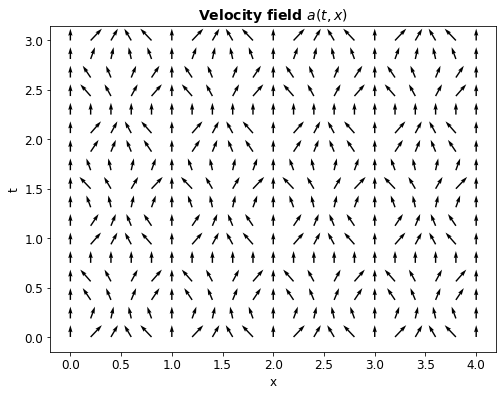

In [11]:
T = 3         # final time
L = 4         # space length

x    = np.linspace(0,L,21)
LT   = np.linspace(0,T,17)
U, V = np.meshgrid(x, LT)

fig, ax = plt.subplots()
U = np.cos(2*np.pi*V)*np.sin(2*np.pi*U)
V = np.ones_like(V)
q = ax.quiver(x, LT, U, V)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title('Velocity field $a(t,x)$', fontsize=14, weight='bold')
plt.show()

> *Remark.* The previous figure represents the velocity field, that is concerned with the characteristic lines for the advective equation $\partial_t u + a(t,x)\partial_x u$ but also to understand the behavior and the properties of the conservative form $\partial_t u + \partial_x (a(t,x) u ) =0$.  
> There are some straigth lines in the $(x-t)$-plane where the velocity field vanishes, namely for $x\in\tfrac{1}{2}\mathbb{Z}$ and for $t\in \tfrac{1}{4}+\tfrac{1}{2}\mathbb{Z}$. The flux along these lines therefore is zero and there is conservation of mass in any space interval of the form $[j,j+1/2]$ for $j\in \tfrac{1}{2}\mathbb{Z}$.

We use the Lax-Friedrichs scheme with $F_{j+1/2}^n \overset{\rm def}{=} \dfrac{1}{2}(f(U_j^n,t^n,x_{j+1/2})+f(U_{j+1}^n,t^n,x_{j+1/2})) - \dfrac{\sigma}{2}(U_{j+1}^n-U_{j}^n)$.

In [12]:
T = 3         # final time
L = 4         # space length

# PDE problem
Flux = FadvTX # flux function

# Numerical data
J = 36     # number of points
mu = 1    # cfl parameter

# Discretization parameters
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1]

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x.copy()],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U,t,x)       # compute f(U_j^0)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

y = np.concatenate(([-dx],x,[L])) + dx/2

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))
    ##########################################
    FL,dFL = Flux(V[:-1],t,y[:-1])                       
    FR,dFR = Flux(V[1:] ,t,y[:-1])
    Vmax = max(np.abs(dFL))
    sigma = Vmax
    NumFlux = 0.5*(FL + FR) - 0.5*sigma*(V[1:]-V[:-1])
    ##########################################
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
    t = t + dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)
    
    
LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

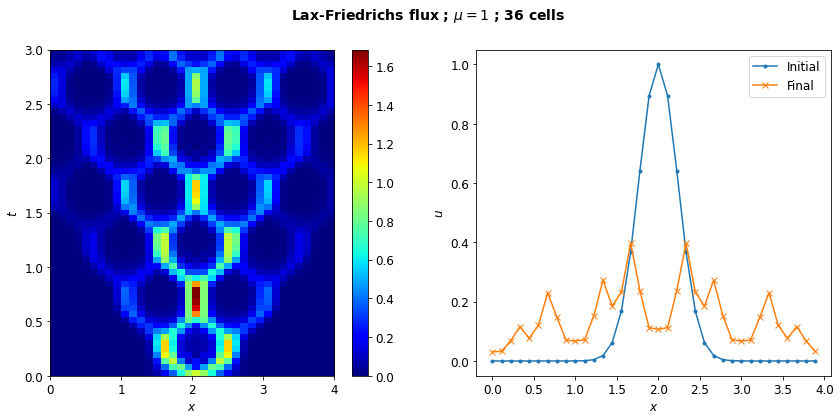

In [13]:
SHOW(UTX,leg='Lax-Friedrichs flux ; $\mu=1$ ; '+str(J)+' cells')

> **Question 3.** From the properties of the velocity field above, explain why the choice of a grid with $J=8p+4$ cells is interesting. What properties are expected to be satisfied for the exact solution to the problem and what kind of defect is however present in the numerical solution ?

> **Answer.** The numerical flux is computed at the points $x_{j+1/2} = (j+1/2)\Delta x = 4(j+1/2)/J$. Among them, there exists an integer $j$ such that $x_{j+1/2}$ coincides with a point in $\tfrac{1}{2}\mathbb{Z}$ if and only if $J\in 4+8\mathbb{N}$.  
The conservation of mass in the elementary intervals previously discussed (of the form $[j,j+1/2]$ for $j\in \tfrac{1}{2}\mathbb{Z}$) is not satisfied for the discrete solution: some mass is going outside the domain $[1,3]$. The reason is that the numerical flux does not vanished at the expected points since it includes also a gradient of the discrete solution.

We perform several computations with finer grids.

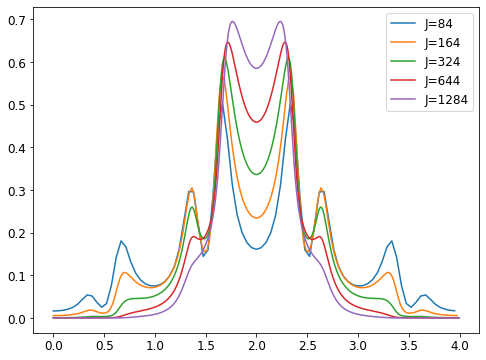

In [14]:
for J in [8*10+4,8*20+4,8*40+4,8*80+4,8*160+4]:

    mu = 1    # cfl parameter
    
    # Discretization parameters
    dx = L/J
    x = np.linspace(0, L, J+1)
    x = x[0:-1]

    ## Initialize
    U = u0(x)
    t = 0
    UTX = np.concatenate([[x.copy()],[U]],axis=0)
    LT = [t,t]

    F,dF = Flux(U,t,x)       # compute f(U_j^0)
    Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
    dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

    y = np.concatenate(([-dx],x,[L])) + dx/2

    ## Time iterations ##
    while t<T:
        dt = min([dt,T-t])
        V = np.concatenate(([U[-1]],U,[U[0]]))
        ##########################################
        FL,dFL = Flux(V[:-1],t,y[:-1])                       
        FR,dFR = Flux(V[1:] ,t,y[:-1])
        Vmax = max(np.abs(dFL))
        sigma = Vmax
        NumFlux = 0.5*(FL + FR) - 0.5*sigma*(V[1:]-V[:-1])
        ##########################################
        U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
        t = t + dt

        LT = np.append(LT,t)
        UTX = np.concatenate([UTX,[U]],axis=0)
    
    LT  = np.resize(LT,(len(LT),1))
    UTX = np.concatenate([UTX,LT],axis=1)
    
    plt.plot(x,U,label='J='+str(J))
    
plt.legend()
plt.show()

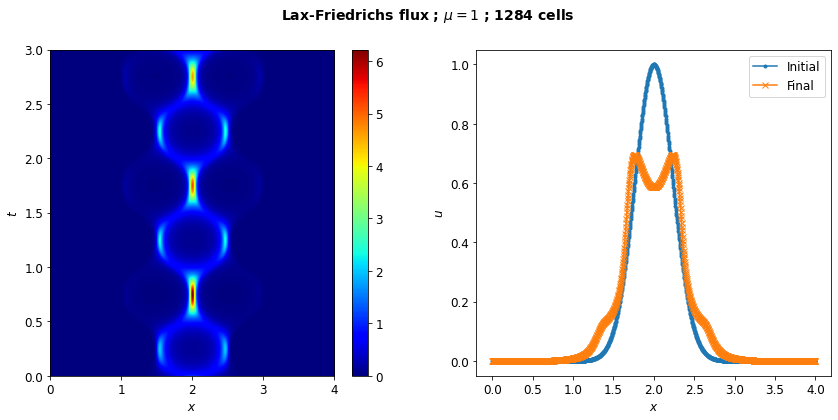

In [15]:
SHOW(UTX,leg='Lax-Friedrichs flux ; $\mu=1$ ; '+str(J)+' cells')

> **Question 4.** Did the defect disappear for large values of $J$ ?

> **Answer.** Increasing the value of $J$ reduces the observed defect.

We consider now another scheme for the resolution of the same problem, using an upwind strategy.
The numerical flux is
$$F_{j+1/2}^n = \begin{cases}f(U_j^n,t_n,x_{j+1/2}), & \textrm{ if } a(t_n,x_{j+1/2})>0 ; \\ 
f(U_{j+1}^n,t_n,x_{j+1/2}), & \textrm{ if } a(t_n,x_{j+1/2})<0.\end{cases}$$

In [16]:
T = 3         # final time
L = 4         # space length

# PDE problem
Flux = FadvTX # flux function

# Numerical data
J = 36     # number of points
mu = 1    # cfl parameter

# Discretization parameters
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1]

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x.copy()],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U,t,x)       # compute f(U_j^0)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

y = np.concatenate(([-dx],x,[L])) + dx/2

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))
    ##########################################
    FL,dFL = Flux(V[:-1],t,y[:-1])                       
    FR,dFR = Flux(V[1:],t,y[:-1])
    NumFlux = FL*(dFL>0) + FR*(dFR<0)
    ##########################################
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
    t = t + dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)
    
    
LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

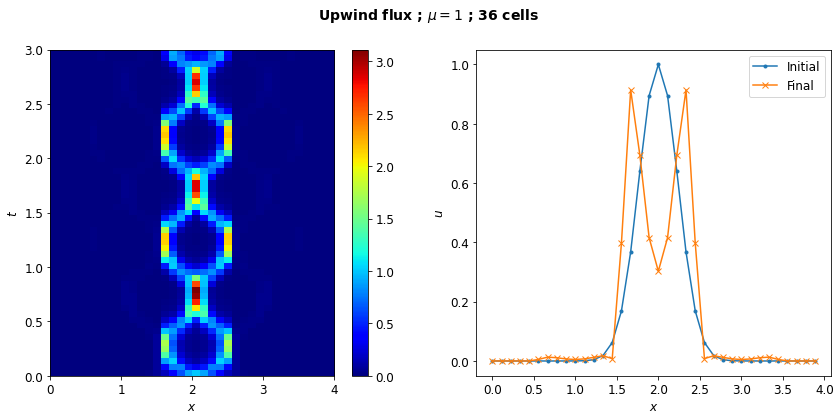

In [17]:
SHOW(UTX,leg='Upwind flux ; $\mu=1$ ; '+str(J)+' cells')

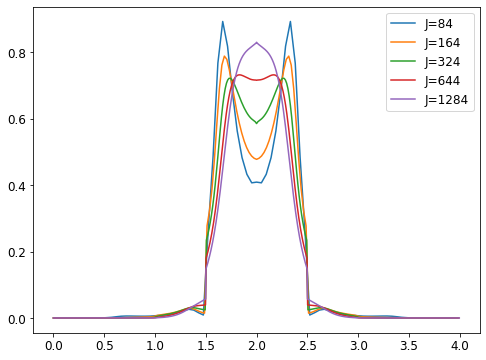

In [18]:
for J in [8*10+4,8*20+4,8*40+4,8*80+4,8*160+4]:

    mu = 1    # cfl parameter
    
    # Discretization parameters
    dx = L/J
    x = np.linspace(0, L, J+1)
    x = x[0:-1]

    ## Initialize
    U = u0(x)
    t = 0
    UTX = np.concatenate([[x.copy()],[U]],axis=0)
    LT = [t,t]

    F,dF = Flux(U,t,x)       # compute f(U_j^0)
    Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
    dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

    y = np.concatenate(([-dx],x,[L])) + dx/2

    ## Time iterations ##
    while t<T:
        dt = min([dt,T-t])
        V = np.concatenate(([U[-1]],U,[U[0]]))
        ##########################################
        FL,dFL = Flux(V[:-1],t,y[:-1])                       
        FR,dFR = Flux(V[1:],t,y[:-1])
        NumFlux = FL*(dFL>0) + FR*(dFR<0)
        ##########################################
        U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
        t = t + dt

        LT = np.append(LT,t)
        UTX = np.concatenate([UTX,[U]],axis=0)
    
    LT  = np.resize(LT,(len(LT),1))
    UTX = np.concatenate([UTX,LT],axis=1)
    
    plt.plot(x,U,label='J='+str(J))
    
plt.legend()
plt.show()

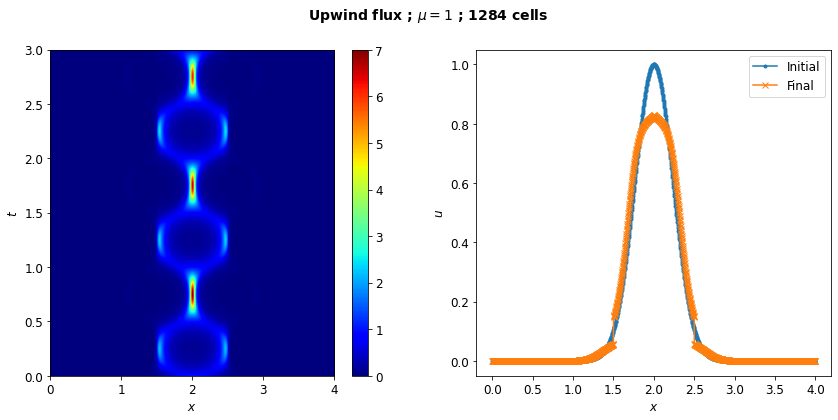

In [19]:
SHOW(UTX,leg='Upwind flux ; $\mu=1$ ; '+str(J)+' cells')

> **Question 5.** Does the upwind scheme provide good results ?

> **Answer.** Even with a very few cells, the upwind scheme strongly reduces the local conservation defect. Having common points in the grid with the $\tfrac{1}{2}\mathbb{Z}$ points, there the numerical flux vanished and the invariance structure is strongly preserved.    
> Increasing the number of cells significantly improves the quality of the result.

## 2. Nonlinear Burgers problem

In [20]:
def Fburgers(u):
    return u**2/2, u

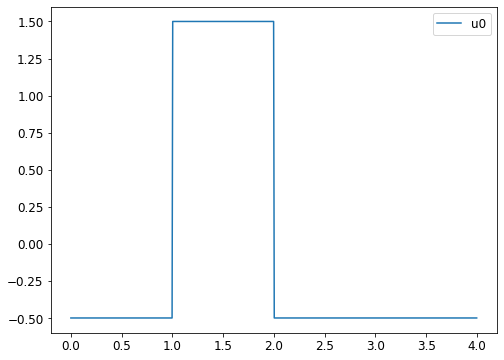

In [21]:
def u0(x):
    return np.array([0.5-np.sign(y-1)*np.sign(y-2) for y in x])
plt.plot(x,u0(x),label='u0')
plt.legend()
plt.show()

In [22]:
# PDE problem
T = 0.5       # final time
L = 4       # space length
Flux = Fburgers # flux function
mu = 0.9   # cfl parameter

J = 100     # number of points

> **Question 6.** Program the Lax-Friedrichs scheme for the Burgers equation:
> $$F_{j+1/2}^n = \dfrac{1}{2}(f(U_j^n)+f(U_{j+1}^n)) - \dfrac{\sigma}{2}(U_{j+1}^n-U_{j}^n),$$
> with $\sigma = \max\big\{|f'(u)|,\ u \in[\inf u_0,\sup u_0]\big\}.$  
> Compare the discrete solution with $\mu=0.9$ for several values of the grid size $J$.

In [23]:
# Discretization parameters
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1]

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x.copy()],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)
sigma = Vmax

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))
    ##########################################
    F,dF = Flux(V)
    NumFlux = 0.5*(F[:-1] + F[1:]) + 0.5*sigma*(V[:-1] - V[1:])
    ##########################################
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)

LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

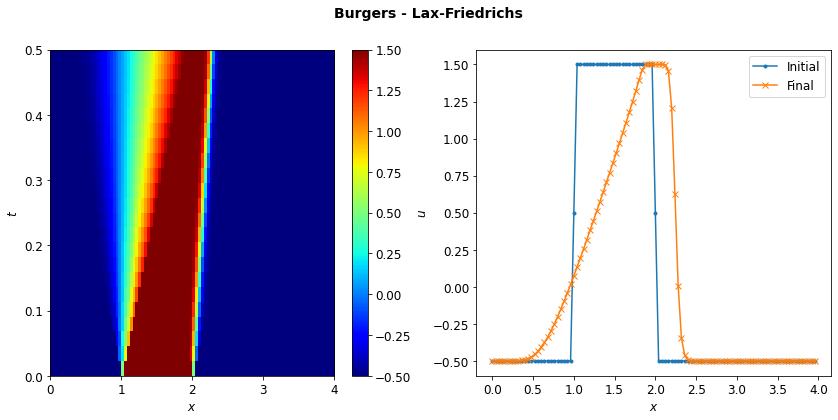

In [24]:
UTXRus = UTX
SHOW(UTXRus,leg="Burgers - Lax-Friedrichs")

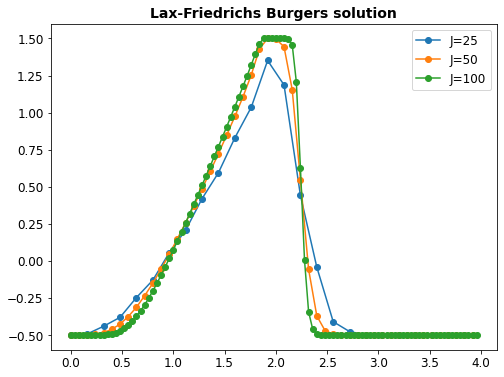

In [25]:
for J in [25,50,100]:
    dx = L/J
    x = np.linspace(0, L, J+1)
    x = x[0:-1]

    ## Initialize
    U = u0(x)
    t = 0
    UTX = np.concatenate([[x.copy()],[U]],axis=0)
    LT = [t,t]
    
    F,dF = Flux(U)
    Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
    dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)
    sigma = Vmax

    ## Time iterations ##
    while t<T:
        dt = min([dt,T-t])
        V = np.concatenate(([U[-1]],U,[U[0]]))
        ##########################################
        F,dF = Flux(V)
        NumFlux = 0.5*(F[:-1] + F[1:]) + 0.5*sigma*(V[:-1] - V[1:])
        ##########################################
        U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
        t = t+dt

        LT = np.append(LT,t)
        UTX = np.concatenate([UTX,[U]],axis=0)

    LT  = np.resize(LT,(len(LT),1))
    UTX = np.concatenate([UTX,LT],axis=1)
    plt.plot(x,U,'-o',label='J='+str(J))
    
plt.title('Lax-Friedrichs Burgers solution', fontsize=14, weight='bold')
plt.legend()
plt.show()

The **Godunov scheme** is defined from the exact solution of local Riemann problems.  
The discrete flux is then obtained as $$F_{j+1/2}^n = f(w(0,U_j^n,U_{j+1}^n))$$ where $w(\xi,U,V)$ denotes the self-similar (and entropy weak) solution to the Riemann problem with left state $U$ and right state $V$.

> **Question 7.** Solve the Riemann problem for the Burgers flux and then program the Godunov scheme for the Burgers problem. Compare the solution to the Lax-Friedrichs scheme.

In [26]:
# Discretization parameters
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x.copy()],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))
    ##########################################
    NumFlux = np.zeros_like(V[1:])
    
    for j in range(len(V)-1):
        if V[j]>V[j+1]:
            if V[j]+V[j+1]>0 :
                FG = V[j]**2/2
            else :
                FG = V[j+1]**2/2
        else :
            if V[j]>0 :
                FG = V[j]**2/2
            elif V[j+1]<0 :
                FG = V[j+1]**2/2
            else :
                FG = 0
        NumFlux[j] = FG
    ##########################################
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)
    
LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

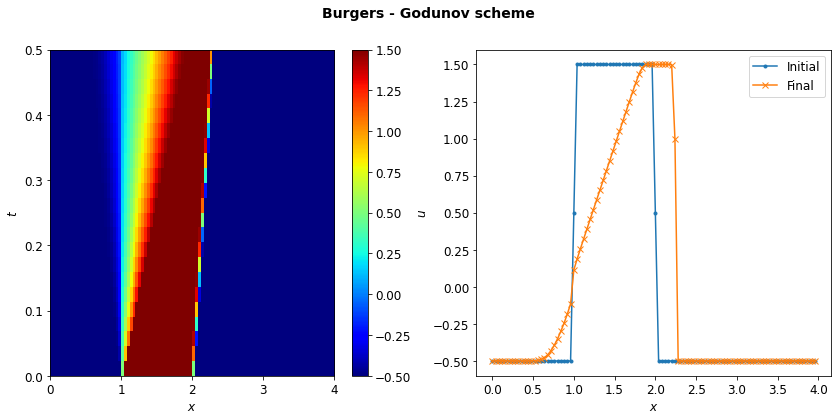

In [27]:
UTXGod = UTX
SHOW(UTXGod,leg="Burgers - Godunov scheme")

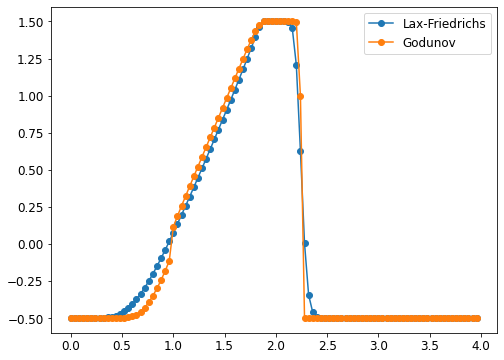

In [28]:
plt.plot(x,UTXRus[-1,:-1],'-o',label="Lax-Friedrichs")
plt.plot(x,UTXGod[-1,:-1],'-o',label="Godunov")
plt.legend()
plt.show()

> **Question 8.** Program the local Lax-Friedrichs scheme for the Burgers equation:
> $$F_{j+1/2}^n = \dfrac{1}{2}(f(U_j^n)+f(U_{j+1}^n)) - \dfrac{\sigma_j^n}{2}(U_{j+1}^n-U_{j}^n),$$
> with $\sigma_j^n = \max\big\{|f'(u)|,\ u \in[\min(U_j^n,U_{j+1}^n),\max(U_j^n,U_{j+1}^n)]\big\}.$  
> Compare the solution to the previous schemes.

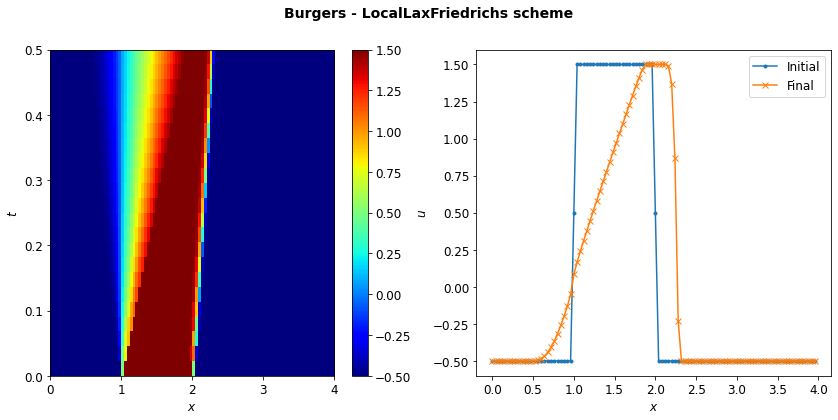

In [29]:
# Discretization parameters
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x.copy()],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[-1]],U,[U[0]]))
    ##########################################
    F,dF = Flux(V)
    NumFlux = 0.5*(F[:-1] + F[1:]) + 0.5*np.maximum(abs(dF[:-1]),abs(dF[1:]))*(V[:-1] - V[1:])
    ##########################################
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)

LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

UTXLocLF = UTX
SHOW(UTXLocLF,leg="Burgers - LocalLaxFriedrichs scheme")

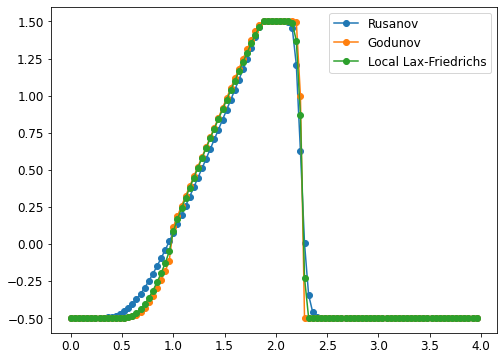

In [30]:
plt.plot(x,UTXRus[-1,:-1],'-o',label="Rusanov")
plt.plot(x,UTXGod[-1,:-1],'-o',label="Godunov")
plt.plot(x,UTXLocLF[-1,:-1],'-o',label="Local Lax-Friedrichs")
plt.legend()
plt.show()

> **Question 9.** Solve a Cauchy problems for the nonlinear equations with flux $f(u)= 2 u^3 -u$.

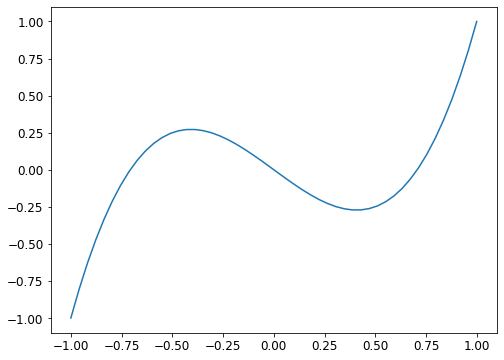

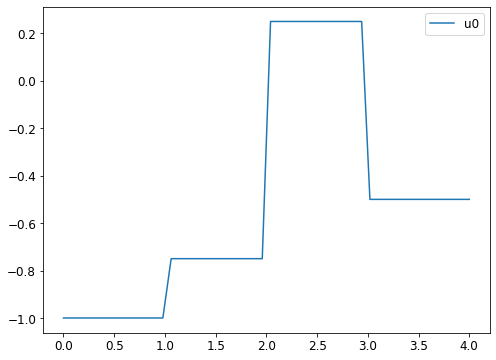

In [31]:
def FLUX(u):
    return 2*u**3-u, 6*u**2-1
up = np.linspace(-1,1)
plt.plot(up,FLUX(up)[0])
plt.show()


def u0(x):
    return -1*(x<1)-0.75*(x>=1)*(x<2)+0.25*(x>=2)*(x<3)-0.5*(x>=3)
x = np.linspace(0,4)
plt.plot(x,u0(x),label='u0')
plt.legend()
plt.show()

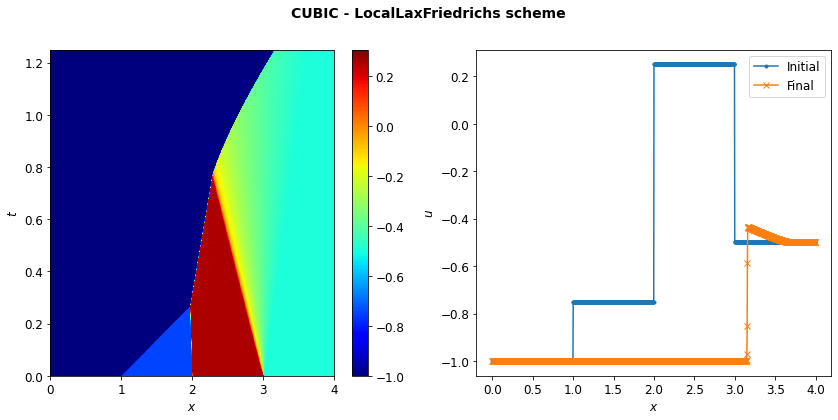

In [32]:
# PDE problem
T = 1.25    # final time
L = 4       # space length
Flux = FLUX # flux function
mu = 0.9   # cfl parameter

J = 1200     # number of points

# Discretization parameters
dx = L/J
x = np.linspace(0, L, J+1)
x = x[0:-1] # removes the very last point for periodicity

## Initialize
U = u0(x)
t = 0
UTX = np.concatenate([[x.copy()],[U]],axis=0)
LT = [t,t]

F,dF = Flux(U)
Vmax = max(np.abs(dF))   # get a bound for velocities (to adapt depending on the properties of f)
dt = mu*dx/max(1,Vmax)   # max(1,Vmax) to avoid very large dt (bad for accuracy)

## Time iterations ##
while t<T:
    dt = min([dt,T-t])
    V = np.concatenate(([U[0]],U,[U[-1]]))
    ##########################################
    F,dF = Flux(V)
    NumFlux = 0.5*(F[:-1] + F[1:]) + 0.5*np.maximum(abs(dF[:-1]),abs(dF[1:]))*(V[:-1] - V[1:])
    ##########################################
    U = U - dt/dx*(NumFlux[1:]-NumFlux[:-1])
    t = t+dt

    LT = np.append(LT,t)
    UTX = np.concatenate([UTX,[U]],axis=0)

LT  = np.resize(LT,(len(LT),1))
UTX = np.concatenate([UTX,LT],axis=1)

SHOW(UTX,leg="CUBIC - LocalLaxFriedrichs scheme")